# Make histogramms for TO3

- author Sylvie Dagoret-Campagne
- date October 18th 2018

In [30]:
# Set up matplotlib and use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib
import matplotlib as mpl
matplotlib.rc_file("templates/matplotlibrc")
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline


Bad key "axes.color_cycle" on line 215 in
templates/matplotlibrc.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [31]:
import os
import re
import numpy as np
from mpl_toolkits.basemap import Basemap
from matplotlib import colors
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd

In [32]:
import datetime as dt

In [33]:
YEARSTR="2018"
YEARNUM=int(YEARSTR)

In [34]:
yearfile='MERRA2_'+YEARSTR+'_inst1_2d_asm_Nx_M2I1NXASM_ohp_AllYear.csv'

In [35]:
df_year=pd.read_csv(yearfile)

In [36]:
df_year.head()

,time,PS,T10M,T2M,TO3,TOX,TQI,TQL,TQV,TS,U10M,U2M,U50M,V10M,V2M,V50M
0,2018-01-01 00:00:00,93586.179688,279.042542,277.924255,306.891296,0.006579,0.002162,0.319946,16.039366,277.089447,1.527891,0.762904,2.875433,-1.997757,-0.959274,-3.679868
1,2018-01-01 01:00:00,93644.218750,278.965088,278.596436,308.947205,0.006623,0.002974,0.182983,15.441454,277.915039,4.309712,2.856233,6.262999,-4.501500,-2.982562,-6.735511
2,2018-01-01 02:00:00,93752.140625,277.812256,277.561188,311.975006,0.006688,0.018402,0.112579,13.318526,276.945557,4.463665,3.018662,5.803768,-6.118572,-4.138448,-8.414824
3,2018-01-01 03:00:00,93814.812500,277.139404,276.858215,315.935669,0.006773,0.024605,0.066193,11.264016,276.241669,3.333664,2.247162,4.378160,-6.393670,-4.307884,-8.974257
4,2018-01-01 04:00:00,93837.578125,276.814911,276.422668,322.490082,0.006913,0.004604,0.045456,9.346043,275.632324,2.848288,1.887254,3.963684,-5.576814,-3.692428,-8.323152


## Per year

In [37]:
df_year.describe()

,PS,T10M,T2M,TO3,TOX,TQI,TQL,TQV,TS,U10M,U2M,U50M,V10M,V2M,V50M
count,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000
mean,93605.010626,286.482574,286.156667,345.078004,0.007404,0.021813,0.060989,17.708672,286.245535,0.021388,0.060915,-0.140465,-0.608788,-0.342864,-0.981685
std,642.563931,8.756767,9.196822,38.505628,0.000826,0.041721,0.078547,8.039066,10.482519,3.024915,2.052015,4.064382,3.049534,2.088572,4.108916
min,91121.617188,266.681335,266.794922,260.325714,0.005581,0.000000,0.000000,2.350126,266.385925,-13.590304,-9.430898,-16.700460,-11.513482,-8.019993,-14.637464
25%,93300.148438,279.055763,278.585747,315.535461,0.006771,0.000093,0.002346,11.400371,278.140938,-1.552075,-0.858643,-2.266323,-2.273400,-1.280303,-3.459140
50%,93729.882812,286.627243,285.894913,333.168030,0.007149,0.003481,0.026630,17.012116,285.614929,0.371513,0.218719,0.418060,-0.537979,-0.322029,-0.767486
75%,94017.107422,293.265198,293.074280,369.230484,0.007920,0.024576,0.091034,24.237048,293.532425,1.971984,1.251754,2.708717,1.319634,0.831863,1.857141
max,95630.148438,307.667267,309.370941,476.769897,0.010235,0.507080,0.454712,41.252686,315.242340,10.241591,6.991255,13.905725,11.095821,7.683163,13.775771


In [38]:
df_year.quantile([0.05,0.1,0.5,0.9,0.95])

,PS,T10M,T2M,TO3,TOX,TQI,TQL,TQV,TS,U10M,U2M,U50M,V10M,V2M,V50M
0.05,92302.062500,273.110608,271.944415,300.570044,0.006450,0.000000,0.000000,5.619297,270.505684,-5.613892,-3.875367,-8.013594,-6.176801,-4.274966,-8.279870
0.10,92726.689063,275.120847,274.126968,306.248471,0.006568,0.000000,0.000039,7.057070,272.605145,-3.382963,-2.225191,-5.243864,-4.598542,-3.170159,-6.778754
0.50,93729.882812,286.627243,285.894913,333.168030,0.007149,0.003481,0.026630,17.012116,285.614929,0.371513,0.218719,0.418060,-0.537979,-0.322029,-0.767486
0.90,94195.792188,298.313348,298.947134,402.105991,0.008627,0.067557,0.181384,28.010021,301.164572,3.421493,2.469278,4.260659,3.108744,2.218974,4.063940
0.95,94403.677344,300.995758,301.934918,421.593069,0.009042,0.104558,0.237729,30.763211,305.357976,4.236855,3.011753,5.114908,4.205025,2.984312,5.398069


In [39]:
h2o_year=df_year["TO3"]

In [40]:
h2o_year.replace(to_replace=0, value=np.nan)

0       306.891296
1       308.947205
2       311.975006
3       315.935669
4       322.490082
5       327.533325
6       331.248047
7       334.646332
8       332.975555
9       332.022736
10      332.829163
11      334.695831
12      337.601929
13      337.983429
14      335.818146
15      338.750916
16      342.253448
17      343.541199
18      345.277710
19      346.144379
20      345.601898
21      342.586090
22      341.128265
23      339.152527
24      336.292603
25      334.295044
26      333.846832
27      332.381042
28      331.308044
29      329.977142
           ...    
5802    304.799316
5803    305.459015
5804    304.171844
5805    303.390717
5806    304.219116
5807    305.193359
5808    305.691711
5809    305.461304
5810    306.657104
5811    308.145203
5812    306.809265
5813    307.429749
5814    309.612579
5815    311.298706
5816    311.497498
5817    310.056244
5818    308.739197
5819    308.198547
5820    308.283234
5821    308.949402
5822    309.250916
5823    309.

In [41]:
np.mean(h2o_year)

345.07800370937207

In [42]:
mean_h2o_y = np.mean(h2o_year)
variance_h2o_y = np.var(h2o_year)
sigma_h2o_y = np.sqrt(variance_h2o_y)

In [43]:
mean_h2o_y=np.trunc(mean_h2o_y*1000)/1000
sigma_h2o_y=np.trunc(sigma_h2o_y*1000)/1000

In [44]:
print mean_h2o_y 
print variance_h2o_y 
print sigma_h2o_y 

345.078
1482.42919172
38.502


In [45]:
title = "Yearly variation of Ozone (year {}), mean = {} std = {}".format(YEARSTR,mean_h2o_y ,sigma_h2o_y)

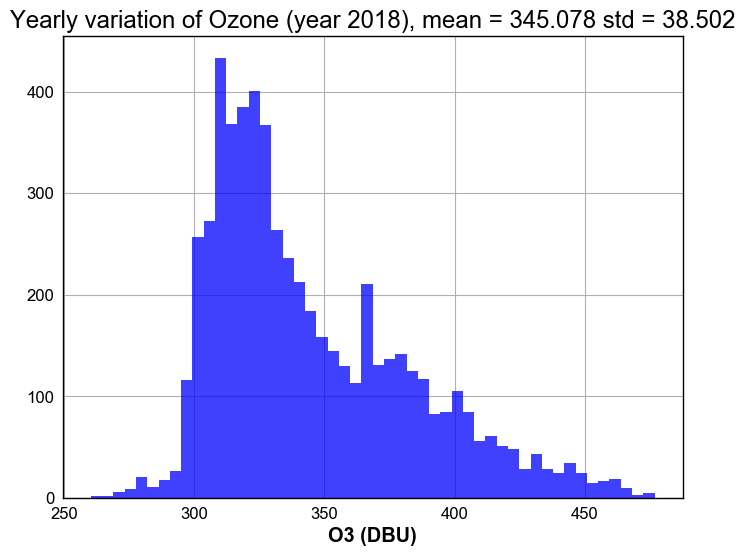

In [46]:
n, bins, patches = plt.hist(h2o_year, 50, normed=False, facecolor='blue', alpha=0.75)
plt.title(title)
plt.xlabel('O3 (DBU)')
figfilename='Histo_O3_'+YEARSTR+'_allyear.jpg'
plt.savefig(figfilename)

# Selection of a period

In [47]:
all_datetime=pd.to_datetime(df_year['time'].get_values())

In [48]:
all_datetime

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 01:00:00',
               '2018-01-01 02:00:00', '2018-01-01 03:00:00',
               '2018-01-01 04:00:00', '2018-01-01 05:00:00',
               '2018-01-01 06:00:00', '2018-01-01 07:00:00',
               '2018-01-01 08:00:00', '2018-01-01 09:00:00',
               ...
               '2018-08-31 14:00:00', '2018-08-31 15:00:00',
               '2018-08-31 16:00:00', '2018-08-31 17:00:00',
               '2018-08-31 18:00:00', '2018-08-31 19:00:00',
               '2018-08-31 20:00:00', '2018-08-31 21:00:00',
               '2018-08-31 22:00:00', '2018-08-31 23:00:00'],
              dtype='datetime64[ns]', length=5832, freq=None)

In [49]:
winter_time_index=np.where(np.logical_and(all_datetime>dt.datetime(YEARNUM,1,1),all_datetime<dt.datetime(YEARNUM,3,31)))

In [50]:
summer_time_index=np.where(np.logical_and(all_datetime>dt.datetime(YEARNUM,6,1),all_datetime<dt.datetime(YEARNUM,8,31)))

In [51]:
pwv_winter=h2o_year.get_values()[winter_time_index]
pwv_summer=h2o_year.get_values()[summer_time_index]

In [52]:
mean_pwv_winter = np.mean(pwv_winter)
variance_pwv_winter = np.var(pwv_winter)
sigma_pwv_winter = np.std(pwv_winter)

In [53]:
mean_pwv_summer = np.mean(pwv_summer)
variance_pwv_summer = np.var(pwv_summer)
sigma_pwv_summer = np.std(pwv_summer)

In [54]:
mw=np.trunc(mean_pwv_winter*10)/10
sw=np.trunc(sigma_pwv_winter*10)/10

ms=np.trunc(mean_pwv_summer*10)/10
ss=np.trunc(sigma_pwv_summer*10)/10

In [55]:
title = "Yearly variation of O3(DbU) (year {}), summer : {} +/- {}, winter : {} +/- {}".format(YEARSTR,ms,ss,mw,sw)

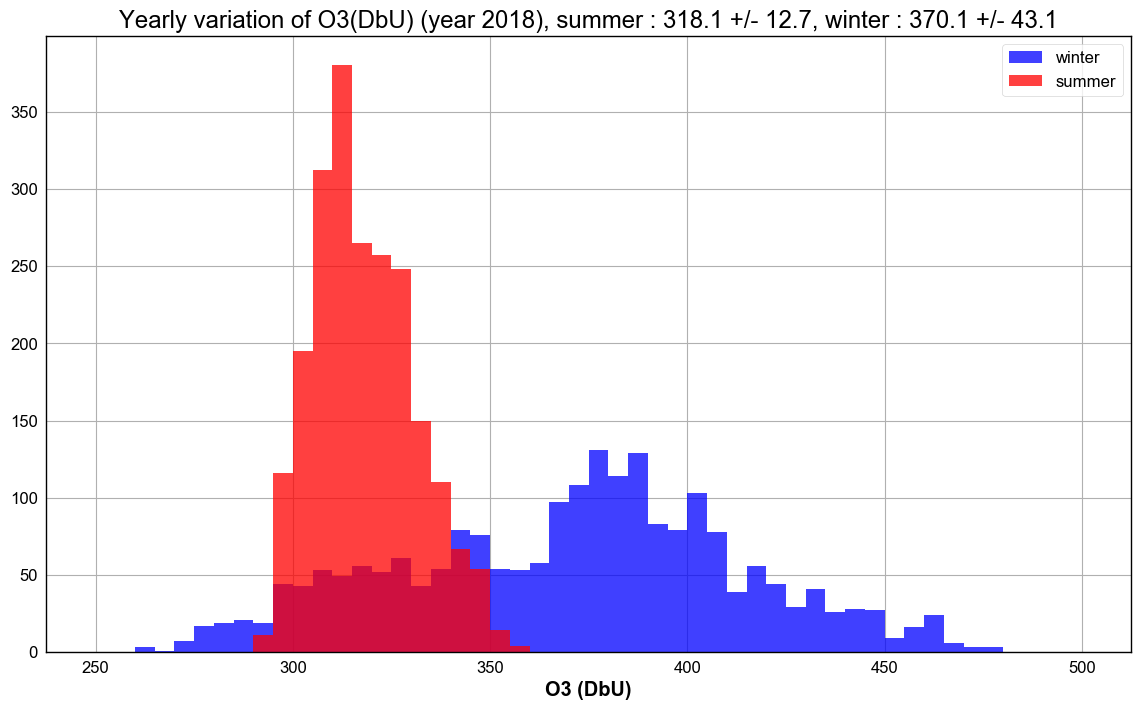

In [59]:
plt.figure(figsize=(14,8))
n, bins, patches = plt.hist(pwv_winter, 50, range=(250,500),normed=False, facecolor='blue', alpha=0.75,label='winter')
n, bins, patches = plt.hist(pwv_summer, 50, range=(250,500),normed=False, facecolor='red', alpha=0.75,label='summer')
plt.title(title)
plt.xlabel('O3 (DbU)')
figfilename='Histo_O3_'+YEARSTR+'_WinterSummer.jpg'
plt.legend()
plt.savefig(figfilename)